In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx

In [2]:
df = pd.read_csv('./Food_Inspections.csv')

In [3]:
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2356070,BE KIDS CAFE,BE KIDS CAFE,2589026,Restaurant,Risk 2 (Medium),2800 W NORTH AVE,CHICAGO,IL,60647.0,01/02/2020,License,Pass,NaN,41.910327,-87.697086,"(-87.69708554310422, 41.91032666817886)"
1,2356086,RAINBOW FINER FOOD & LIQUOR,RAINBOW FINER FOOD & LIQUOR,9138,Grocery Store,Risk 2 (Medium),6316 S ASHLAND AVE,CHICAGO,IL,60636.0,01/02/2020,Complaint Re-Inspection,Pass w/ Conditions,2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...,41.778922,-87.664353,"(-87.66435268109221, 41.7789224055316)"
2,2356067,DONA TOLA,DONA TOLA,2684259,Restaurant,Risk 1 (High),3751 N SOUTHPORT AVE,CHICAGO,IL,60613.0,01/02/2020,License,Fail,NaN,41.950349,-87.663961,"(-87.66396116151019, 41.95034913354049)"
3,2356062,SWEET VIRGINIA'S KITCHEN,SWEET VIRGINIA'S KITCHEN,2483108,Restaurant,Risk 1 (High),5131 N DAMEN AVE,CHICAGO,IL,60625.0,01/02/2020,Canvass,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.975717,-87.679246,"(-87.67924580841124, 41.97571673235794)"
4,2356068,BE KIDS CAFE,BE KIDS CAFE,2589027,Restaurant,Risk 2 (Medium),2800 W NORTH AVE,CHICAGO,IL,60647.0,01/02/2020,License Re-Inspection,Pass,NaN,41.910327,-87.697086,"(-87.69708554310422, 41.91032666817886)"


In [4]:
df.shape

(15014, 17)

In [5]:
df.Results.unique()

array(['Pass', 'Pass w/ Conditions', 'Fail', 'Not Ready', 'No Entry',
       'Out of Business', 'Business Not Located'], dtype=object)

### Mapa

In [9]:
chicago_map = gpd.read_file('./map/chicago_streets.shp')
# El de abajo es para cambiar el mapa por uno que solo muestra el área de Chicago
#chicago_map = gpd.read_file('./map/chicago.shp')

In [10]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]
geo_df = gpd.GeoDataFrame(df,
                         crs=crs,
                         geometry=geometry)

/home/bruno/miniconda3/envs/dpa/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

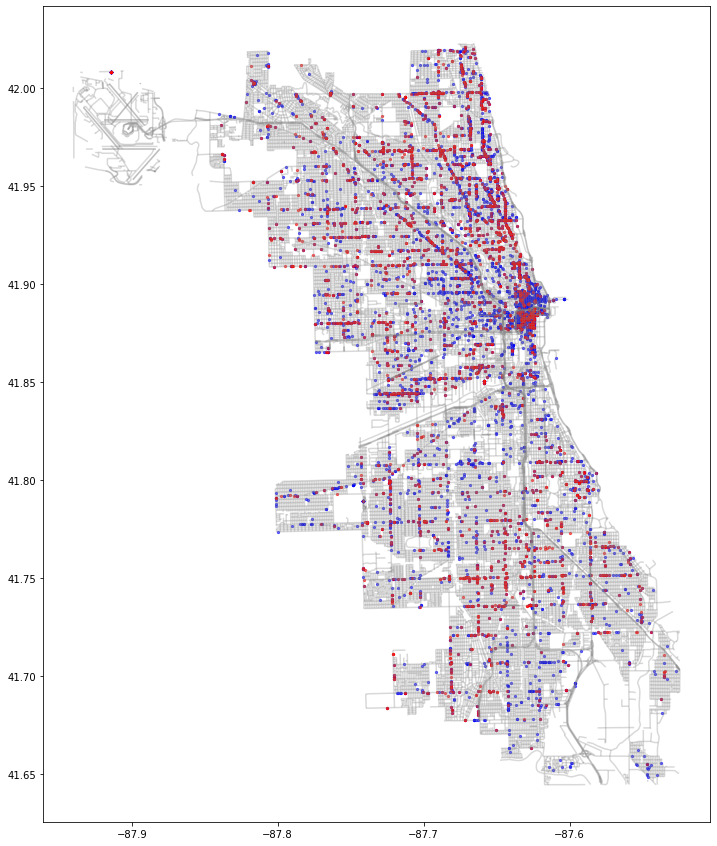

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
chicago_map.plot(ax=ax, alpha = 0.3, color='gray')
geo_df[geo_df['Results']=='Pass'].plot(ax=ax, markersize = 5, alpha = 0.6, color = 'blue')
geo_df[geo_df['Results']=='Fail'].plot(ax=ax, markersize = 5, alpha = 0.6, color = 'red')
#ctx.add_basemap(ax)

El de abajo es un intento para incluir el mapa de google de fondo

In [39]:
# db_wm = geo_df.to_crs(epsg=3857)

/home/bruno/miniconda3/envs/dpa/lib/python3.8/site-packages/contextily/tile.py:632: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


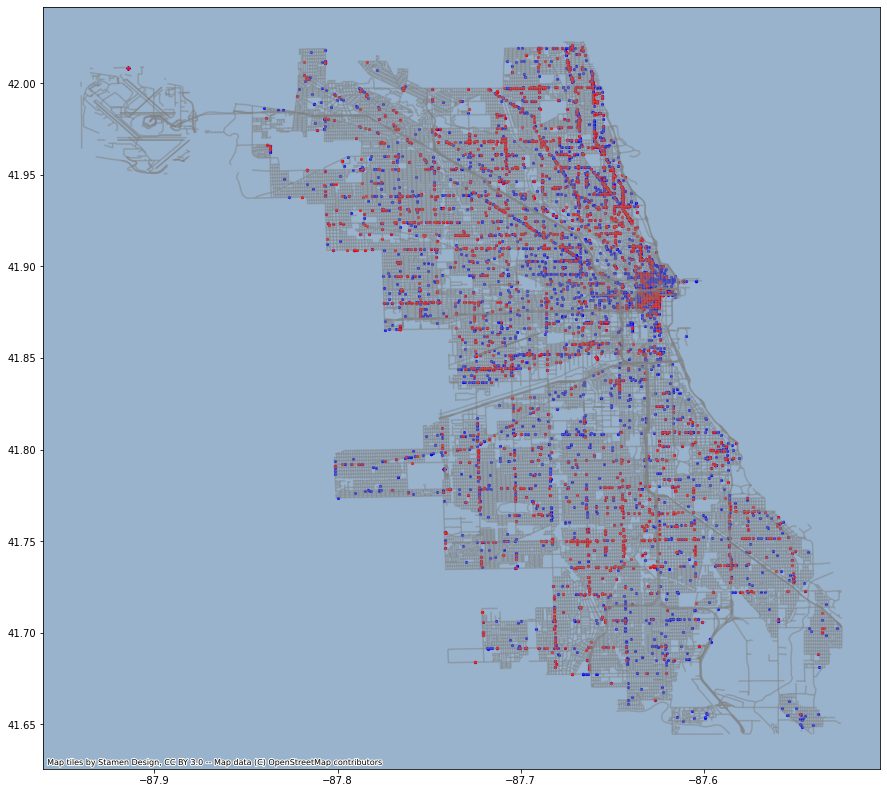

In [40]:
# fig, ax = plt.subplots(figsize=(15,15))
# chicago_map.plot(ax=ax, alpha = 0.5, color='gray')
# geo_df[geo_df['Results']=='Pass'].plot(ax=ax, markersize = 5, alpha = 0.8, color = 'blue')
# geo_df[geo_df['Results']=='Fail'].plot(ax=ax, markersize = 5, alpha = 0.8, color = 'red')
# ctx.add_basemap(ax)